### 1.라이브러리 불러오기

일반 CPU 활용 시

In [1]:
import os
import cv2

In [2]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dropout, Flatten, Dense

In [4]:
import numpy as np
from numpy import array

In [5]:
from tensorflow.keras.utils import to_categorical

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

### 1. 데이터 불러오기

In [8]:
(x_train, y_train), (x_test,y_test) =\
    keras.datasets.fashion_mnist.load_data()

In [9]:
## 정답지를 해석할 수 있는 리스트
## 예시 fashion_mnist_labels[9] = Ankleboot
fashion_mnist_labels = ["T-shrt/top",
                        "Trouser",
                        "Pullover",
                        "Dress",
                        "Coat",
                        "Sandal",
                        "Shirt",
                        "Sneaker",
                        "Bag",
                        "Ankle boot"]

In [10]:
fashion_mnist_labels[ y_train[0] ]

'Ankle boot'

### 2. 데이터 분리 및 정제

In [11]:
x_trainClean = x_train.astype("float32") / 255
x_testClean = x_test.astype("float32") / 255

totalTrainImgLen = x_trainClean.shape[0]
totalTestImgLen = x_testClean.shape[0]

imgSize = x_train[0].shape[0]

w,h = imgSize, imgSize

x_trainClean = x_trainClean.reshape( totalTrainImgLen, w, h, 1)
x_testClean = x_testClean.reshape( totalTestImgLen, w, h, 1)

y_trainOne = to_categorical(y_train, 10)
y_testOne = to_categorical(y_test, 10)

In [43]:
modelInputDim = x_trainClean[0].shape

In [46]:
### train 
### features -> x_trainClean
### label -> y_trainOne

In [80]:
model = keras.Sequential()

In [81]:
### 0. inputLayer! (입력데이터 첫번째 shape 들어가야한다)

In [82]:
model.add(Conv2D( filters=32, 
                  kernel_size=3,
                  padding="same",
                  activation="relu",
                  input_shape=modelInputDim))

In [83]:
### 1. Hidden Layer!

In [84]:
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.7))
model.add(Conv2D( filters=32, 
                  kernel_size=3, 
                  padding="same",
                  activation="relu")

SyntaxError: incomplete input (3376228515.py, line 6)

In [85]:
model.add(MaxPooling2D(pool_size=2))

In [76]:
model.add(Flatten())

In [77]:
### 2. Output Layer!

In [78]:
model.add(Dense(10, activation="softmax"))

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)               

In [20]:
y_train[5]

2

In [21]:
y_trainOne[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [24]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [25]:
import cv2

In [26]:
inImg = cv2.imread("../images/gender/0/1_0_0_20161219140627985.jpg.chip.jpg")

In [27]:
cvtImg = cv2.cvtColor(inImg, cv2.COLOR_BGR2RGB)

In [28]:
import matplotlib.pyplot as plt

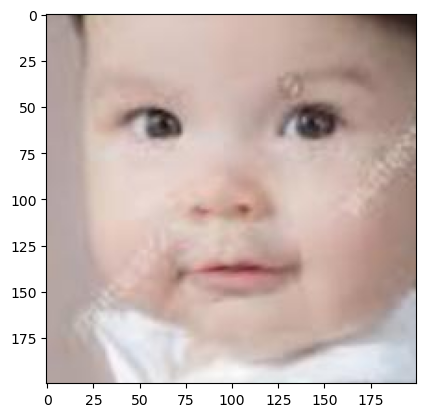

In [29]:
plt.imshow(cvtImg)

In [30]:
# # 라이브러리 정의 
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import pandas as pd

cuda nvidia gpu 활용 시

In [31]:
# How to check if the code is running on GPU or CPU?

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13608052248287453195
xla_global_id: -1
]


intel gpu 활용 시

In [32]:
# import numpy as np
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋 
# from keras.datasets import mnist


In [33]:
import warnings

In [34]:
warnings.filterwarnings(action="ignore")

In [35]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

### 2. 데이터 불러오기 및 분리

In [36]:
# imageList = []
# labelList = []
# IMG_SIZE = 32

# basedir = "../images/mnist/trainingSet/"

# categories = os.listdir(basedir)

# # 폴더 순환
# for i in range (0, len(categories)):
#     labelPath = os.path.join(basedir,categories[i])
#     imagePath = os.listdir(labelPath)
#     # 이미지 순환
#     for j in range(0, len(imagePath)):
#         imageFullPath = os.path.join(labelPath, imagePath[j])
#         try:
#             baseImg = cv2.imread(imageFullPath, cv2.IMREAD_GRAYSCALE)
#             ### 1. 이미지 사이즈 변경
#             refinedImg = cv2.resize(baseImg, (IMG_SIZE,IMG_SIZE))
#             imageList.append(refinedImg)
#             labelList.append(i)
#         except Exception as e:
#             print(e, imageFullPath)
#             pass

# imageArray = np.array(imageList)
# labelArray = np.array(labelList)

# print(imageArray.shape)
# print(labelArray.shape)

# imageDatas = [imageArray, labelArray]

In [37]:
import pickle

In [38]:
with open('mnistImage.pickle', 'wb') as f:
    pickle.dump(imageDatas, f)

NameError: name 'imageDatas' is not defined

In [ ]:
with open('mnistImage.pickle', 'rb') as f:
    imageDatas = pickle.load(f) # 단 한줄씩 읽어옴

In [ ]:
imageArray = imageDatas[0]
labelArray = imageDatas[1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainingData_features,\
testData_features,\
trainingData_labels,\
testData_labels = \
train_test_split(imageArray, labelArray, test_size = 0.2, random_state=2)

In [ ]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

In [ ]:
trainingData_features = trainingData_features.reshape(len(trainingData_features), 
                              IMG_SIZE, 
                              IMG_SIZE, 
                              1)
testData_features = testData_features.reshape(len(testData_features), 
                          IMG_SIZE, 
                          IMG_SIZE, 
                          1)

In [ ]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

In [ ]:
trainingData_features_norm = trainingData_features/255.0
testData_features_norm = testData_features/255.0

In [ ]:
### 접답지는 softmax랑 결합을 위한 onehot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
trainingData_labels_one = to_categorical(trainingData_labels)
testData_labels_one = to_categorical(testData_labels)

### 3. 모델 생성

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [ ]:
# np.argmax(trainingData_labels_one)

In [ ]:
inputShape = trainingData_features_norm[0].shape
inputShape

outputShape = len(trainingData_labels_one[0])
outputShape

## load vgg16 model 자중치 및 top input layer 제외
vgg_model = VGG16(weights=None, include_top=False, input_shape=inputShape)

In [ ]:
vgg_model.summary()

In [ ]:
#Create your own input format (here 3x200x200)
inputs = Input(shape=inputShape,name = 'image_input')

#Use the generated model 
output_vgg16_conv = vgg_model(inputs)

In [ ]:
#Dense레이어 추가
x = Flatten(name='flatten')(output_vgg16_conv)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(outputShape, activation='softmax', name='predictions')(x)

In [ ]:
#커스텀 모델 생성
my_model = Model(inputs=inputs, outputs=x)

In [ ]:
my_model.summary()

In [ ]:
#Add a layer where input is the output of the  second last layer 
x = Dense(outputShape, activation='softmax', name='predictions')(vgg_model.layers[-2].output)

#Then create the corresponding model 
my_model = Model(inputs=vgg_model.input, outputs=x)
my_model.summary()

In [ ]:
my_model.compile(loss="categorical_crossentropy", 
              optimizer= "adam",
              metrics=["accuracy"] )

In [ ]:
epochs = 10
my_model.fit(x=trainingData_features_norm,
              y=trainingData_labels_one,
              epochs=epochs,
              validation_data = (testData_features_norm, testData_labels_one))

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
# 모델생성 시작
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,
                 kernel_size=3, 
                 padding="same", 
                 activation="relu",
                 input_shape=inputShape))

In [ ]:
model.add(MaxPooling2D(pool_size= 2 ))

In [ ]:
model.add(Dropout(rate=0.4)) # 사용한 비율을 설정

In [ ]:
model.add(Conv2D(filters=32,
                 kernel_size=3, 
                 padding="same", 
                 activation="relu",
                 input_shape=inputShape))

In [ ]:
model.add(MaxPooling2D(pool_size= 2 ))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=outputShape, activation="softmax"))

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model, show_shapes=True)

### 4. 모델 컴파일 (loss, metrics, optimizer)

In [ ]:
# model.compile(loss=keras.losses.categorical_crossentropy, 
#               optimizer= keras.optimizers.Adam(),
#               metrics=["accuracy"] )

In [ ]:
model.compile(loss="mean_squared_error", 
              optimizer= "adam",
              metrics=["accuracy"] )

In [ ]:
model.compile(loss="categorical_crossentropy", 
              optimizer= "adam",
              metrics=["accuracy"] )

### 5. 모델 학습(훈련)

In [ ]:
epochNo = 10

In [ ]:
len(trainingData_features_norm)

In [ ]:
33600 / 32

In [ ]:
model.fit(x=trainingData_features_norm, 
          y=trainingData_labels_one,
          epochs=epochNo,
          batch_size=32,
          validation_data=(testData_features_norm, testData_labels_one) )

### 6. 모델 추론

In [ ]:
model.evaluate(x = testData_features_norm,
               y = testData_labels_one)

### 7. 모델 예측

In [ ]:
def refineImage(testImg):

    # 사이즈 조정
    IMG_SIZE=28  
    # 컬러이미지 -> 회색톤으로 변경
    img_gray = cv2.cvtColor(testImg, cv2.COLOR_RGB2GRAY)
    img_resize = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))
    ### shape 변경
    img_shape = img_resize.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    ### 정규화
    img_norm = img_shape/255.0
    return img_norm

In [ ]:
testData = cv2.imread("./sample_mnist.jpg", cv2.IMREAD_COLOR)

In [ ]:
refinedImageOne = refineImage(testData)

In [ ]:
predictValue = np.argmax(model.predict(refinedImageOne))
predictValue

### 모델 저장

In [ ]:
# 모델구조저장
model_json = model.to_json()

with open("./model_mnist.json","w") as json_file:
    json_file.write(model_json)

model.save_weights("./model_mnist_weight.h5")

### gpu 종료

In [ ]:
from tensorflow.keras import backend as K

K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()